# Python para Engenharia - Outubro/2023
Andre Nepomuceno - UFF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.optimize import curve_fit
from scipy.integrate import quad, solve_ivp
%matplotlib inline

**1. Listas**

**2. Numpy**

Autovalores e Autovetores

In [2]:
A = np.array([[0,0.5], [-1,2]])
print(A,'\n')

[[ 0.   0.5]
 [-1.   2. ]] 



In [3]:
#Autovalores e Autovetores
vals, vecs = np.linalg.eig(A)
print(vals)

[0.29289322 1.70710678]


In [4]:
vecs

array([[-0.86285621, -0.28108464],
       [-0.50544947, -0.95968298]])

In [5]:
x1 = vecs[:,0]
x1

array([-0.86285621, -0.50544947])

**Exemplo 2: Modos de vibração** \
\begin{gather}
 \begin{pmatrix} 10 & -5 \\ -5 & 10
 \end{pmatrix}
  \begin{pmatrix} X_1 \\ X_2
 \end{pmatrix}
 =
 \omega^2
\begin{pmatrix} X_1 \\ X_2
 \end{pmatrix}
\end{gather} 

In [6]:
A = np.array([ [10,-5],[-5,10]])
A

array([[10, -5],
       [-5, 10]])

In [7]:
omega2, X = np.linalg.eig(A)
omega2

array([15.,  5.])

In [8]:
X

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

**Exemplo 3: Circuito** \
Vamos escrever o sistema na forma matricial (RI = V)
\begin{gather}
\begin{pmatrix}
50 & 0 & -30\\
0 & 40 & -20 \\
-30 & -20 & 100
\end{pmatrix}
\begin{pmatrix}
I_1 \\
I_2 \\
I_3
\end{pmatrix}
= 
\begin{pmatrix}
80\\
80\\
0
\end{pmatrix}
\end{gather}

In [9]:
R = np.array([[50, 0, -30], [0, 40, -20], [-30, -20, 100]])
V = np.array([80,80,0])   

In [10]:
I1, I2, I3 = np.linalg.solve(R,V)

In [11]:
print('I1 = {:.2f} A'.format(I1))
print('I2 = {:.2f} A'.format(I2))
print('I3 = {:.2f} A'.format(I3))

I1 = 2.33 A
I2 = 2.61 A
I3 = 1.22 A


**3. Matplotlib**

3.1 - Gráfico Simples

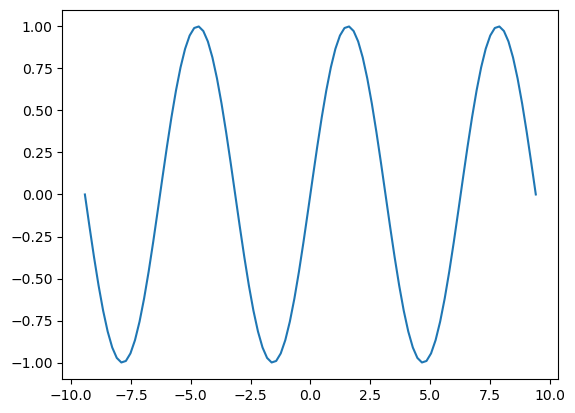

In [14]:
x = np.linspace(-3*np.pi,3*np.pi,100)
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y)
#plt.plot(x,z)
#plt.legend(loc=2,frameon=False)
#plt.xlim(0,7)
#plt.ylim(-1.5,1.5)
#plt.xlabel('Eixo X',fontsize=12)
#plt.ylabel(r'$\theta$',fontsize=12)
#plt.legend(loc=2)
#plt.plot(x,y,'r--',marker='o',mec='r',mfc='w',markersize=6,label='sen(x)')
#plt.plot(x,z,c='b',lw=2,label='cos(x)')
#plt.legend(loc=2,fontsize=12,frameon=False)
#plt.savefig('my_plot.pdf')
#ax = plt.gca()
#ax.tick_params(labelsize=15)

3.2 - Gráfico de Barras

Text(0, 0.5, 'Consumo em milhares de sacas')

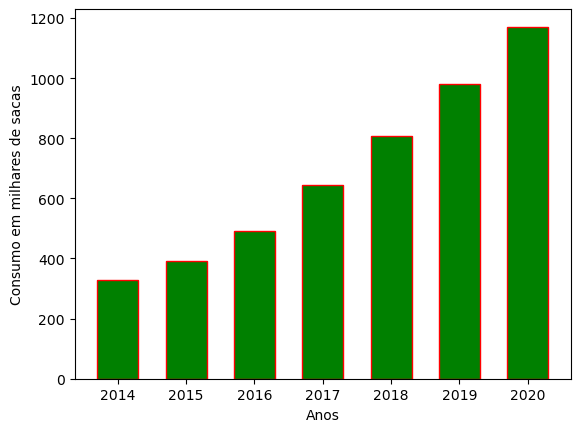

In [15]:
anos = np.arange(2014,2021)
consumo = np.array([327,392,490,643,806,981,1171])
#plt.bar(anos,consumo)
plt.bar(anos, consumo, width=0.6,color='g',edgecolor='r')
plt.xlabel('Anos')
plt.ylabel('Consumo em milhares de sacas')

3.3 - Barra de Erros

<ErrorbarContainer object of 3 artists>

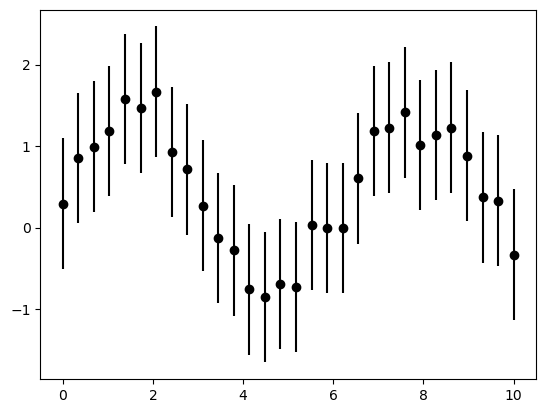

In [19]:
x = np.linspace(0,10,30)
dy = 0.8 
y = np.sin(x) + dy*np.random.random(30)
plt.errorbar(x,y,yerr=dy,fmt='ko')
#plt.errorbar(x,y,yerr=dy,ecolor='r',elinewidth=1,capsize=3,fmt='b.')

3.4 - Histograma

done


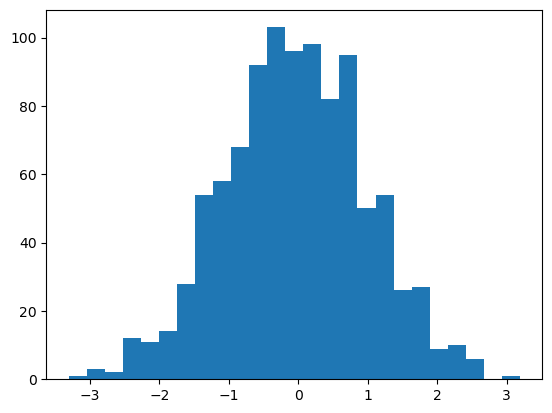

In [21]:
data = np.random.randn(1000) 
plt.hist(data,bins=25)
#plt.hist(data,bins=25,color='r',edgecolor='b',density=True)
print('done')

3.5 - Scatter Plots

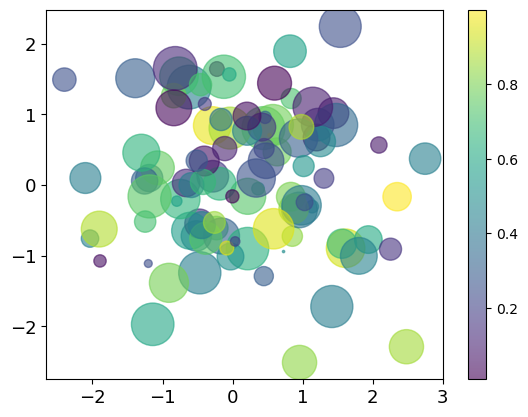

In [23]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000*np.random.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.6)
plt.colorbar()
plt.tick_params(labelsize=13)

**4. Raízes de Funções**

**5. Ajuste de Curvas**

In [24]:
data = np.loadtxt('dados_pendulo.txt')
comp = data[:,0]
T = data[:,1]
sigmaT = data[:,2]

<ErrorbarContainer object of 3 artists>

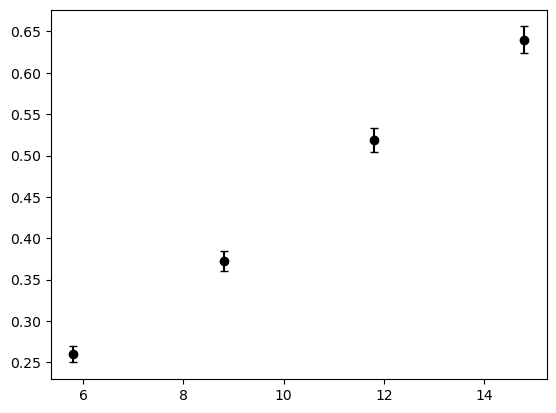

In [25]:
T2 = T**2
sigmaT2 = 2*T*sigmaT
plt.errorbar(comp,T2,sigmaT2,capsize=3,fmt='ok')

In [26]:
def periodo2(L,a,b):
    return a*L + b

In [27]:
popt,pcov = curve_fit(periodo2,comp,T2,sigma=sigmaT2,absolute_sigma=True)
popt

array([0.04258387, 0.00890565])

In [28]:
err_y = np.sqrt(np.diag(pcov))
err_y

array([0.00193438, 0.01881484])

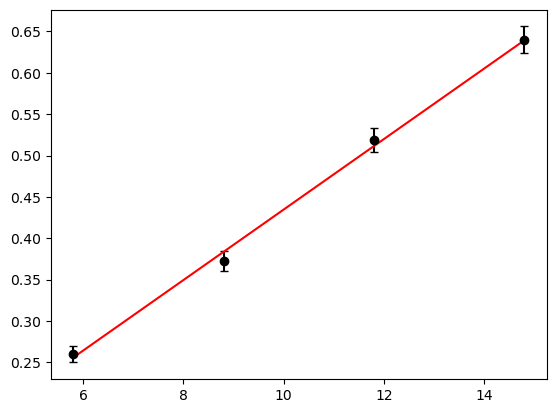

In [29]:
x = np.linspace(comp.min(),comp.max(),100)
plt.errorbar(comp,T2,sigmaT2,capsize=3,fmt='ok')
plt.plot(x,periodo2(x,popt[0],popt[1]),'r')

**6. Integração Numérica**

In [30]:
f1 = lambda x: 1/np.sqrt(np.abs(x))

In [32]:
quad(f1,-1,1,points=[0])

(3.9999999999999813, 5.684341886080802e-14)

**7. Equações Diferenciais**

6.1 - ED0 de primeira ordem

In [34]:
def dydt(t,y):
    return -k*y

In [35]:
k = 0.2
y0 = 100
#intervalo de tempo
t0, tf = 0,20

In [36]:
solve_ivp (dydt , (t0 , tf), y0 = [y0])

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.13797324,  1.51770566,  6.11233264, 10.4942851 ,
       14.88942184, 19.28378064, 20.        ])
 t_events: None
        y: array([[100.        ,  97.27826059,  73.81996665,  29.46989971,
         12.27361105,   5.09829981,   2.11809624,   1.83542088]])
 y_events: None

In [37]:
sol1 = solve_ivp (dydt ,(t0, tf), [y0])
sol1.y

array([[100.        ,  97.27826059,  73.81996665,  29.46989971,
         12.27361105,   5.09829981,   2.11809624,   1.83542088]])

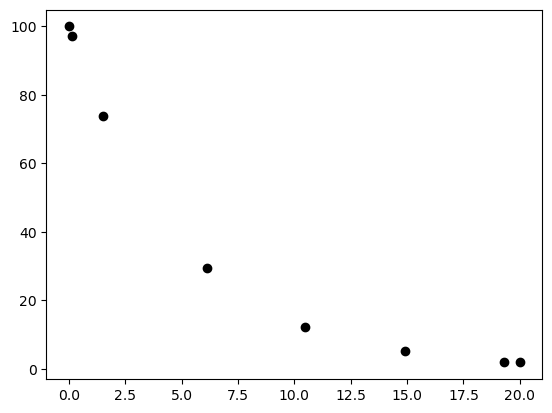

In [38]:
plt.plot(sol1.t,sol1.y[0],'ok')

Para obter a solução com uma maior resolução temporal, podemos passar um array para o argumenot **t_eval**

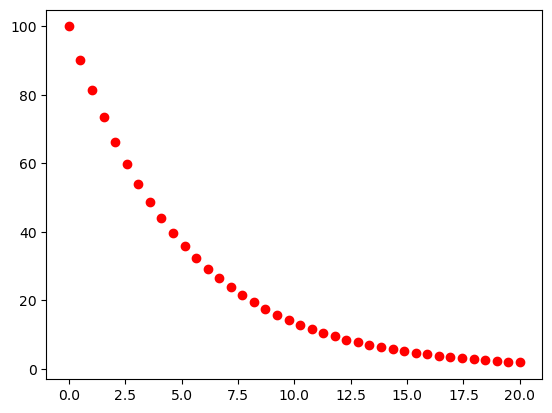

In [40]:
tpoints = np.linspace(t0,tf,40)
sol2 = solve_ivp (dydt, (t0, tf), [y0],t_eval=tpoints)
plt.plot(sol2.t, sol2.y[0],'ro')

6.2 - ED0s Acopladas
\begin{eqnarray*}
&\frac{dx}{dt} = xy - x, \\
&\frac{dy}{dt} = y -xy + sen^2\omega t \\
\end{eqnarray*}

In [53]:
def F(t,Y):
    x,y  = Y
    dxdt = x*y - x
    dydt = y - x*y + np.sin(omega*t)**2
    return dxdt, dydt

In [55]:
r0 = [1.,1.]
omega = 1
N = 100
t0,tf = 0,10
tpoints = np.linspace(t0,tf,N)
sol3 = solve_ivp(F,(t0, tf), y0=r0,t_eval=tpoints)

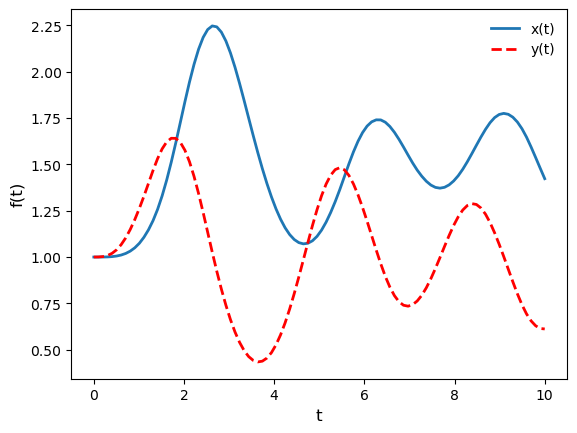

In [60]:
plt.plot(tpoints,sol3.y[0],lw=2,label='x(t)')
plt.plot(tpoints,sol3.y[1],'--r',lw=2,label='y(t)')
plt.xlabel('t',fontsize=12)
plt.ylabel('f(t)',fontsize=12)
plt.legend(frameon=False)

6.3 EDOs de Segunda Ordem
\begin{equation}
    \frac{d^2x}{dt^2} \,=\, - \omega^2 x \nonumber
\end{equation}

In [62]:
omega = 0.9
A = 3
v0 = 0
t0,tf = 0,20
t = np.linspace(t0,tf,100)

In [64]:
def F(t,Y):
    x,v = Y
    dxdt = v
    dvdt = -omega**2*x
    return dxdt,dvdt

In [65]:
sol4 = solve_ivp(F,(t0,tf),y0=[A,v0],t_eval=t)
print(sol4.success)

True


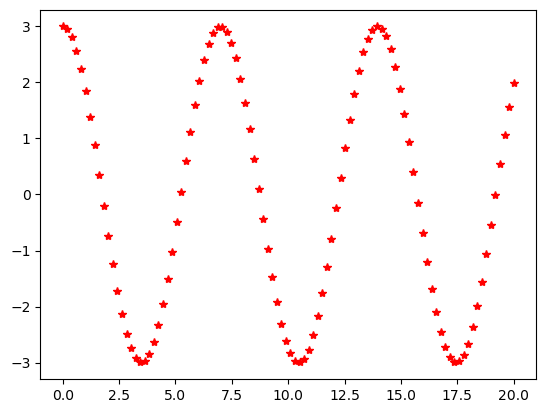

In [67]:
#plot solução
plt.plot(sol4.t,sol4.y[0],'r*')

**Exemplo 4: Pêndulo Não-Linear**

\begin{equation}
\frac{d\theta}{dt} = \psi \\
\frac{d\psi}{dt} = - \omega^2\textrm{sen}\theta
\end{equation}

In [68]:
def pendulo(t,Y,omega):
    theta,psi = Y
    dthdt = psi
    dpsidt = -omega**2*np.sin(theta)
    return dthdt, dpsidt

In [69]:
#Pendulo linear (para comparação)
def pend_linear(t,theta0):
    return theta0*np.cos(omega*t)

In [70]:
#constantets
omega = 0.7
t0,tf = 0,20
t = np.linspace(t0,tf,200)

In [71]:
#theta0 = 10 graus
y0_1 = [np.radians(10.),0.]
sol_pend1 = solve_ivp(pendulo, (t0, tf), y0 = y0_1,args=(omega,),t_eval=t)

In [73]:
#theta0 = 60 graus
y0_2 = [np.radians(60.),0.]
sol_pend2 = solve_ivp(pendulo, (t0, tf), y0 = y0_2,args=(omega,),t_eval=t)

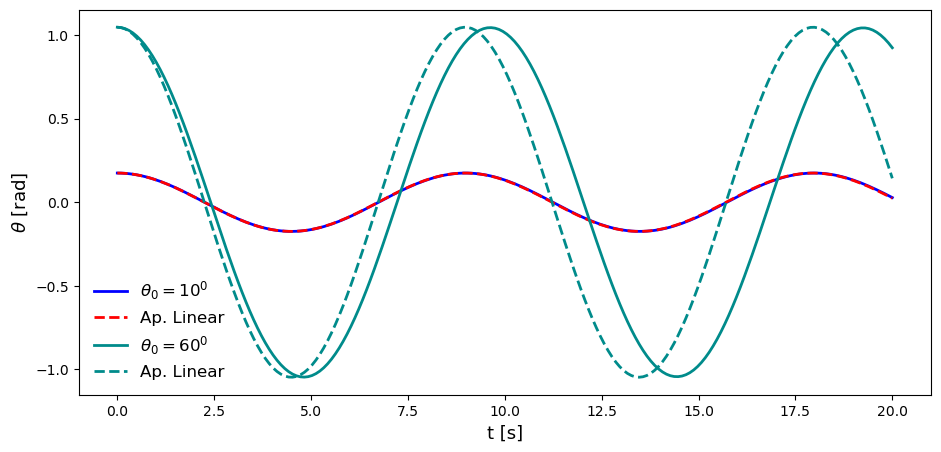

In [74]:
plt.figure(figsize=(11,5))
plt.plot(sol_pend1.t,sol_pend1.y[0],'b',lw=2,label=r'$\theta_0 = 10^{0}$')
plt.plot(t,pend_linear(t,y0_1[0]),'r--',lw=2,label='Ap. Linear')
plt.plot(sol_pend2.t,sol_pend2.y[0],c='darkcyan',lw=2,label=r'$\theta_0 = 60^{0}$')
plt.plot(t,pend_linear(t,y0_2[0]),c='darkcyan',ls='--',lw=2,label='Ap. Linear')
plt.xlabel('t [s]',fontsize=13)
plt.ylabel(r'$\theta$ [rad]',fontsize=13)
plt.legend(loc=3,fontsize=12,frameon=False)

**Conservação da Energia** \
$E = \frac{1}{2}m\,L^2\psi^2 + mg\,l(1 - cos\theta)$

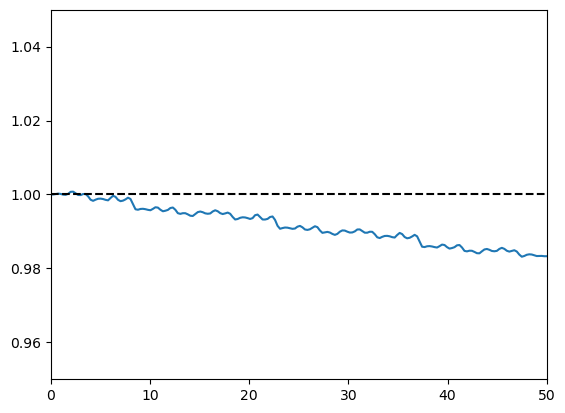

In [75]:
m = 1
g = 9.81
L = g/omega**2
t0,tf = (0,50)
sol_pend3 = solve_ivp(pendulo, (t0, tf), y0 = y0_2,args=(omega,),t_eval=np.linspace(0,tf,200)) #DOP853
Etotal = m*g*L*(1-np.cos(y0_2[0]))
E = 0.5*m*L**2*sol_pend3.y[1]**2 +  m*g*L*(1-np.cos(sol_pend3.y[0]))
plt.plot(sol_pend3.t,E/Etotal)
plt.ylim(0.95,1.05)
plt.xlim(0,tf)
plt.hlines(1,0,tf,ls='--',color='k')